In [1]:
%matplotlib inline

In [2]:
from numpy.random import randn, uniform, normal,randint
import random
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import calendar
from datetime import date, timedelta
import json
import uuid
import importlib
ourGen = importlib.import_module("generator")
ourGen = importlib.reload(ourGen)

In [3]:


class WorldGenerator:
    
    def loadCompanies(self,count):
        path = 'surnames/sp500.csv'
        companylist = pd.read_csv(path,  header=0)

        arr = np.arange(len(companylist)).astype(np.int32)
        np.random.shuffle(arr)
        companylist.head()
        ret = []
        for x in range(count):
            i = arr[x]
            row = companylist.iloc[i]
            fields = ["Symbol","Name","Sector"]
            addMe = {}
            for field in fields:
                addMe[field] = row[field]
            ret.append(addMe)
        return ret
    
    def employmentHistory(self,years,switchprob):
        
        arr = np.arange(len(self.companies)).astype(np.int32)
        np.random.shuffle(arr)
        
        last = int(arr[0])
        ret = [last]
        while len(ret) < years:
            if uniform() < switchprob:
                last = int(arr[len(ret)])
            ret.append(last)
        return ret
    
    def friendsOf(self,i):
        hist = self.people[i]["employment"]
        friends = {}
        for j in range(len(self.people)):
            if i != j:
                other = self.people[j]
                count = 0
                for k in range(len(hist)):
                    if (hist[k] == other["employment"][k]):
                        count += 1

                if count > 0:
                    friends[other["id"]] = count

        return friends

    def __init__(self,mcount=50,mmean=1968,mstd=9,fcount=50,fmean=1973,fstd=9):
        peopleGen = ourGen.PersonGenerator()
        people = peopleGen.getGroupAround(mmean,mstd,mcount,"M")
        people.extend( peopleGen.getGroupAround(fmean,fstd,fcount,"F"))
        self.people = []
        
        for x in people:
            if (x["birth"]["year"] <2018-23):
                self.people.append(x)
       
        self.companies = self.loadCompanies(int(len(people)/3))
       
            
        self.properties = {
    "occupation":["marketing","finance","IT","accounting","legal","sales"],
    "wealth":["not much","some","average","quite a bit","vast sums"],
    "generosity":["stingy","poor","average","generous","fantastic"],
    "enthusiam":["Not much","Some","Average","Great","Hero"],
    "communication":["Silent","Some","Average","A Lot"] }

        for pep in self.people:
            pep["employment"] = self.employmentHistory(8,0.25)
            for key, value in self.properties.items():
                pep[key] = value[randint(0, len(value))]
            
        for i in range(len(self.people)):
            pep = self.people[i]
            pep["friends"] = self.friendsOf(i)
           
                
    def asDict(self):
        lookup = {}


        for pep in self.people:
            lookup[pep["id"]] = pep
    
        host = self.people[randint(0, len(self.people))]["id"]
        return {"properties":self.properties,"people":lookup,"founder":host,"companies":self.companies}
        
    def export(self,filename):
        with open(filename, 'w') as outfile:
            json.dump(self.asDict(),outfile,indent=4, sort_keys=True)
   
        

In [4]:
world = WorldGenerator(mcount=50,fcount=50)

In [5]:
world.people[1]

{'birth': {'day': 17, 'month': 5, 'year': 1954},
 'communication': 'Some',
 'employment': [22, 17, 17, 25, 25, 25, 7, 7],
 'enthusiam': 'Great',
 'first': 'Jay',
 'friends': {'1e6aacba-730c-4793-b825-b1c53a416a3d': 2,
  '315a237d-65f5-44d3-b6b5-44433e95746e': 3,
  '6af456c0-68a8-430b-b394-6c8b5ce16a3f': 2,
  '7a36278b-68e0-4414-b7d1-8eabac188a26': 2,
  '8aad0df1-0aed-43e9-879a-f4b3be6e4dd3': 1,
  '8bd56123-4e5a-4661-b7be-ce84b7a3fbd8': 4,
  'c08c353d-9130-4a00-bf7a-331a4891ede5': 2,
  'd55bdd6e-4226-4747-8f9e-03b25a0d4bde': 2,
  'd58a7f99-7555-4f80-85fc-173f4594e6b9': 2,
  'd80eafd2-544f-4e1d-9288-a9017a697691': 3,
  'e7254515-9d18-4f24-8316-c82077e3e456': 2,
  'ef07e0d5-6587-43fc-8fad-d0386f0b2a2a': 2,
  'f5749774-558d-47d3-9038-d875092f14b3': 1},
 'gender': 'M',
 'generosity': 'generous',
 'id': '35b1ff52-7403-41ab-9177-9d2db2395647',
 'imageID': 32,
 'last': 'Shaffer',
 'middle': 'Pierre',
 'name': 'Jay P. Shaffer',
 'occupation': 'accounting',
 'wealth': 'average'}

## demographics

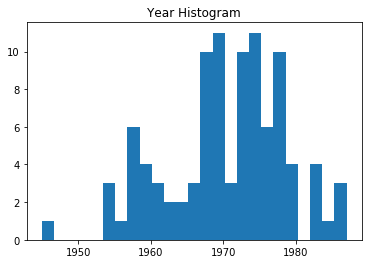

In [6]:
years = []
for i in world.people:
    years.append(i["birth"]["year"])

yearnp = np.array(years)
plt.hist(yearnp,bins=25)
plt.title("Year Histogram")
plt.show()

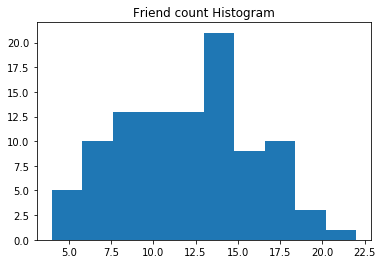

In [7]:
years = []
for i in world.people:
    years.append(len(i["friends"]))

yearnp = np.array(years)
plt.hist(yearnp)
plt.title("Friend count Histogram")
plt.show()

In [8]:
jobs = len(np.unique(world.people[1]["employment"]))
jobs

4

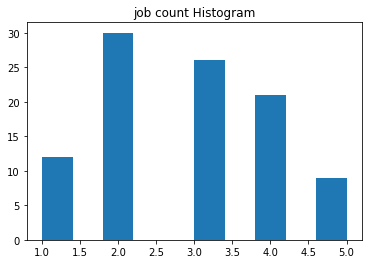

In [9]:
years = []
for i in world.people:
    jobs = len(np.unique(i["employment"]))

    years.append(jobs)

yearnp = np.array(years)
plt.hist(yearnp)
plt.title("job count Histogram")
plt.show()

In [10]:
world.export("world.json")